In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import FastICA
from announce import *

In [2]:
early_warning_url = "data_exp_1.csv"
early_warning = pd.read_csv(early_warning_url, sep=";")
early_warning

,Unnamed: 0,frame_time,total_pacotes,total_pacotes_icmp,total_pacotes_udp,total_pacotes_tcp,maior_pacote,menor_pacote,soma_pacotes,total_ips_origem,...,10_coefficient_variation_std_tcp_time_relative,10_lag-1AC_std_tcp_time_relative,10_lag-2AC_std_tcp_time_relative,10_lag-3AC_std_tcp_time_relative,10_skw_mean_tcp_time_relative,10_kurt_mean_tcp_time_relative,10_coefficient_variation_mean_tcp_time_relative,10_lag-1AC_mean_tcp_time_relative,10_lag-2AC_mean_tcp_time_relative,10_lag-3AC_mean_tcp_time_relative
0,0,"Aug 18, 2011 08:19:13.328377000 UTC",1343,1,597,710,1514,60,1063048,108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Aug 18, 2011 08:19:14.001200000 UTC",1829,4,764,978,1514,60,1352117,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Aug 18, 2011 08:19:15.005031000 UTC",1794,4,859,888,1514,60,1274290,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"Aug 18, 2011 08:19:16.004984000 UTC",1797,3,643,1110,1514,60,1244046,159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Aug 18, 2011 08:19:17.000069000 UTC",2047,5,889,1104,1514,60,1415830,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8798,8798,"Aug 18, 2011 10:45:51.000139000 UTC",13063,0,271,12729,1514,60,12434675,193,...,0.198314,0.373041,0.188673,0.228270,-0.778374,1.919347,0.295774,0.547461,0.455502,0.467108
8799,8799,"Aug 18, 2011 10:45:52.001829000 UTC",11448,0,223,11160,1514,60,10711927,149,...,0.198197,0.372345,0.187880,0.227413,-0.779524,1.925385,0.295608,0.546494,0.455061,0.466422
8800,8800,"Aug 18, 2011 10:45:53.000249000 UTC",19537,0,332,19158,1514,60,18804518,194,...,0.197878,0.370958,0.186528,0.227835,-0.772473,1.925770,0.295801,0.547163,0.453754,0.467004
8801,8801,"Aug 18, 2011 10:45:54.000253000 UTC",23437,0,234,23186,1514,60,22579857,139,...,0.197621,0.370033,0.186868,0.225963,-0.772488,1.939248,0.295409,0.547758,0.454853,0.465247


In [3]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
        
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [4]:
idioma = 'en'
labels_traducao = []
if idioma == 'en':
    labels_traducao = ['\n\nKurtosis of total \nsource IPs',
                      '\n\nCV of total packets',
                       '\n\nSkewness of total \ndestination IPs',
                       'Group 1',
                       'Group 2',
                       'Normal interval',
                       'Malicious interval',
                       '\n\nTotal source IPs',
                        '\n\nTotal packages',
                        '\n\nTotal destination IPs',
                      ]

# Avaliação 1

In [5]:
colunas = ['10_kurt_total_ips_origem', '10_skw_total_ips_destino', '10_coefficient_variation_total_pacotes' ]
limit = 3794
init = limit - 500
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
clustering = KMeans(n_clusters=2, random_state=0).fit(x_train)    
y_test = clustering.labels_
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))

[[413  45]
 [ 32  10]]
              precision    recall  f1-score   support

           0     0.9281    0.9017    0.9147       458
           1     0.1818    0.2381    0.2062        42

    accuracy                         0.8460       500
   macro avg     0.5550    0.5699    0.5605       500
weighted avg     0.8654    0.8460    0.8552       500



<Figure size 640x480 with 0 Axes>

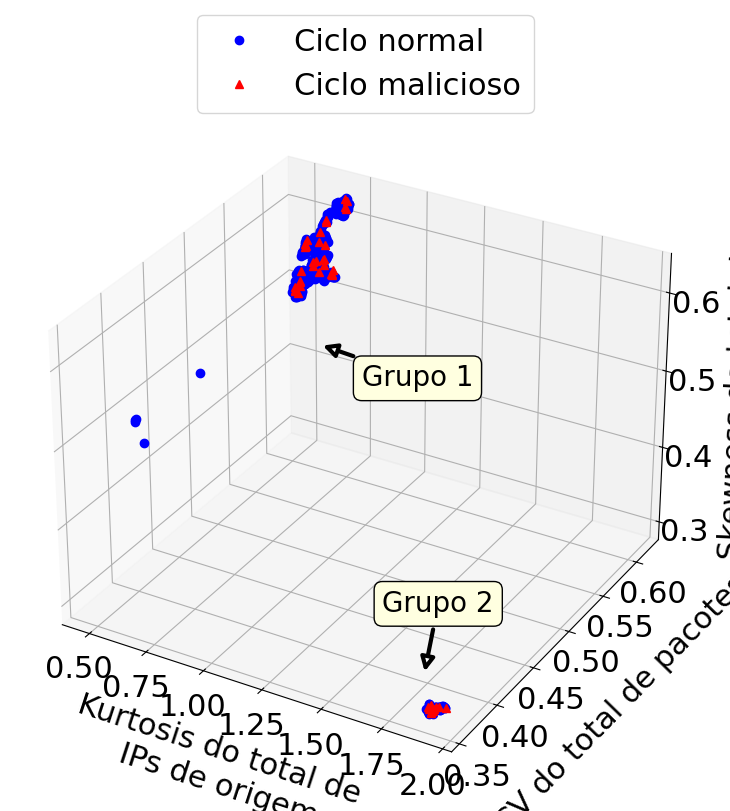

<Figure size 640x480 with 0 Axes>

In [6]:
colunas = ['10_kurt_total_ips_origem', '10_skw_total_ips_destino', '10_coefficient_variation_total_pacotes',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22
font_size_group = 20

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)

ax2.set_xlabel('\n\nKurtosis do total de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nCV do total de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

c = [ "blue" if i == 0 else "red" for i in y_test]

ax2.annotate3D('Grupo 1', (0.8, 0.55, 0.5),
              xytext=(30, -30),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 2', (0.8, 0.7, -0.1),
              xytext=(-30, 45),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("original.pdf")
plt.show()
plt.clf()

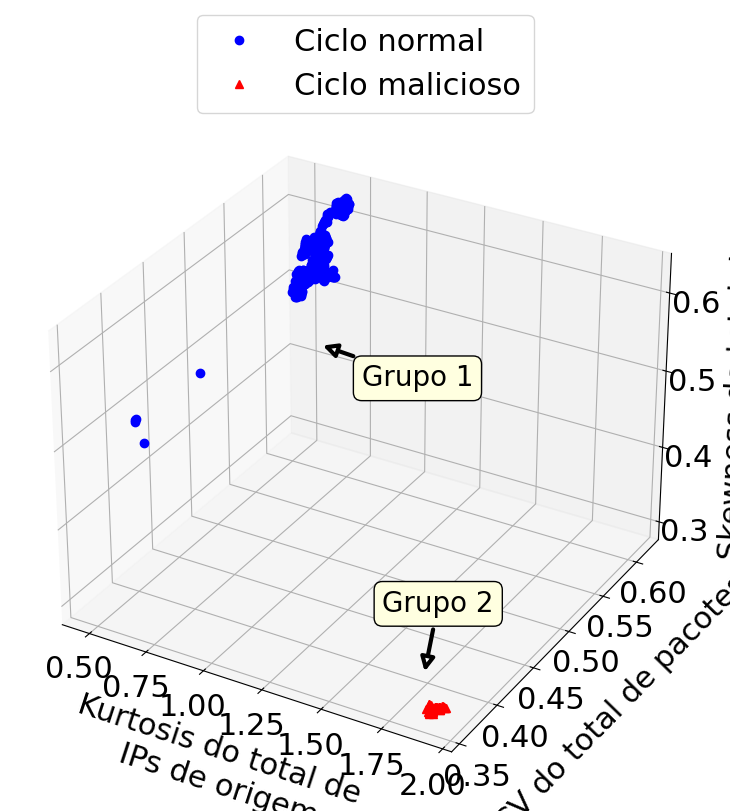

In [7]:
df1= dataframe.query('y_test == 0')                                
df2= dataframe.query('y_test == 1')  

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]


ax2.set_xlabel(labels_traducao[0], fontsize=font_size)
ax2.set_ylabel(labels_traducao[1], fontsize=font_size)
ax2.set_zlabel(labels_traducao[2], fontsize=font_size)

font_size_group = 20

ax2.annotate3D('Grupo 1', (0.8, 0.55, 0.5),
              xytext=(30, -30),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 2', (0.8, 0.7, -0.1),
              xytext=(-30, 45),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.set_xlabel('\n\nKurtosis do total de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nCV do total de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("cluster.pdf")
plt.show()

<Figure size 640x480 with 0 Axes>

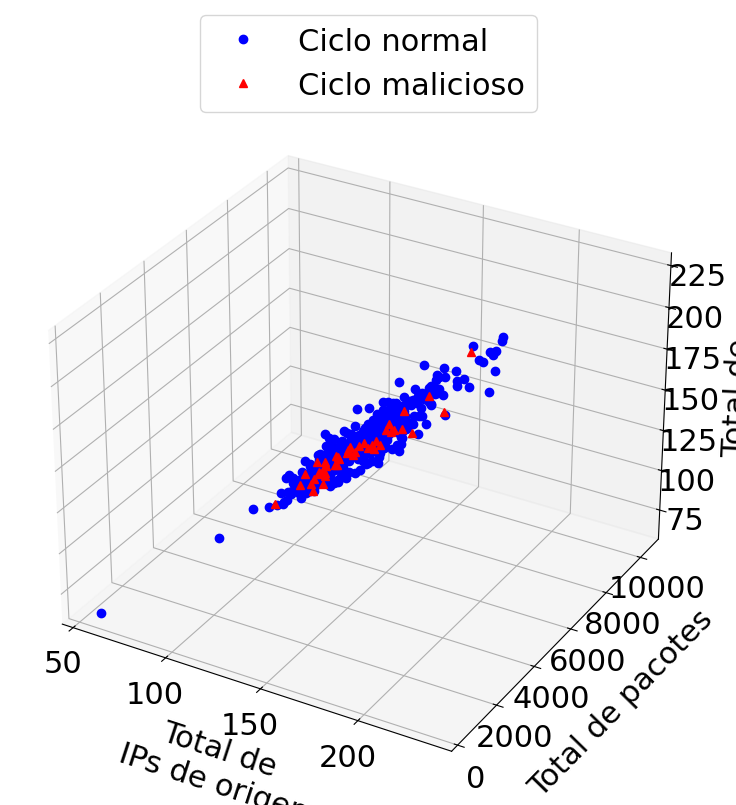

<Figure size 640x480 with 0 Axes>

In [8]:
colunas = ['total_ips_origem', 'total_ips_destino', 'total_pacotes',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22
ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]


ax2.set_xlabel('\n\nTotal de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nTotal de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nTotal de \n IPs de destino', fontsize=font_size)

font_size_group = 20

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("sem_esap.pdf")
plt.show()
plt.clf()

# Avaliação 2

In [9]:

colunas = ['10_kurt_total_ips_origem', '10_skw_total_ips_destino', '10_coefficient_variation_total_pacotes' ]
limit = 3794
init = limit - 500
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]

resultado2 = announce(x_train)
pd.set_option('display.max_rows', resultado2.shape[0]+1)
resultado2.to_csv('resultado_teste_padrao_exp_2.csv', sep=";")
resultado2

,Algorithm,mean,Calinski_harabasz_score_minmax,Silhouette_score_minmax,CDBW_minmax,Davies_bouldin_score_minmax_normalizado,SDBW_minmax_normalizado,Calinski_harabasz_score,Silhouette_score,Davies_bouldin_score,SDBW,CDBW,Davies_bouldin_score_minmax,SDBW_minmax
0,"BisectingKMeans(n_clusters=2, random_state=0)",0.975865,1.000000,1.000000,1.000000,0.964103,0.915219,12576.617376,0.928592,0.067760,0.063377,39.043327,0.035897,0.084781
1,BisectingKMeans(bisecting_strategy='largest_cl...,0.975865,1.000000,1.000000,1.000000,0.964103,0.915219,12576.617376,0.928592,0.067760,0.063377,39.043327,0.035897,0.084781
2,"Birch(n_clusters=2, threshold=0.4)",0.975865,1.000000,1.000000,1.000000,0.964103,0.915219,12576.617376,0.928592,0.067760,0.063377,39.043327,0.035897,0.084781
3,"Birch(n_clusters=2, threshold=0.3)",0.975865,1.000000,1.000000,1.000000,0.964103,0.915219,12576.617376,0.928592,0.067760,0.063377,39.043327,0.035897,0.084781
4,"SOM(m=2, n=1, dim=3, random_state=0)",0.877911,1.000000,1.000000,0.510232,0.964103,0.915219,12576.617376,0.928592,0.067760,0.063377,19.921141,0.035897,0.084781
5,MeanShift(),0.877911,1.000000,1.000000,0.510232,0.964103,0.915219,12576.617376,0.928592,0.067760,0.063377,19.921141,0.035897,0.084781
6,"KMeans(n_clusters=2, random_state=0, tol=1)",0.877911,1.000000,1.000000,0.510232,0.964103,0.915219,12576.617376,0.928592,0.067760,0.063377,19.921141,0.035897,0.084781
7,"KMeans(n_clusters=2, random_state=0, tol=0.1)",0.877911,1.000000,1.000000,0.510232,0.964103,0.915219,12576.617376,0.928592,0.067760,0.063377,19.921141,0.035897,0.084781
8,"KMeans(n_clusters=2, random_state=0, tol=0.01)",0.877911,1.000000,1.000000,0.510232,0.964103,0.915219,12576.617376,0.928592,0.067760,0.063377,19.921141,0.035897,0.084781
9,"KMeans(n_clusters=2, random_state=0, tol=0.001)",0.877911,1.000000,1.000000,0.510232,0.964103,0.915219,12576.617376,0.928592,0.067760,0.063377,19.921141,0.035897,0.084781


In [10]:
print(resultado2['Algorithm'][0])
clustering = eval(resultado2['Algorithm'][0])
clustering.fit(format_data(x_train))
y_test = clustering.labels_
y_test = [0 if i == 1 else 1 for i in clustering.labels_]
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))

BisectingKMeans(n_clusters=2, random_state=0)
[[413  45]
 [ 32  10]]
              precision    recall  f1-score   support

           0     0.9281    0.9017    0.9147       458
           1     0.1818    0.2381    0.2062        42

    accuracy                         0.8460       500
   macro avg     0.5550    0.5699    0.5605       500
weighted avg     0.8654    0.8460    0.8552       500



# Avaliação 3

In [11]:
cols = early_warning.columns[361:]
print(cols)
limit = 3794
init = limit - 500
x_train_novo = early_warning[cols].copy()[init:limit]
y_real_novo = early_warning['has_bot'][init:limit]
x_train_novo = x_train_novo.fillna(0)

Index(['10_skw_total_pacotes', '10_kurt_total_pacotes',
       '10_coefficient_variation_total_pacotes', '10_lag-1AC_total_pacotes',
       '10_lag-2AC_total_pacotes', '10_lag-3AC_total_pacotes',
       '10_skw_total_pacotes_icmp', '10_kurt_total_pacotes_icmp',
       '10_coefficient_variation_total_pacotes_icmp',
       '10_lag-1AC_total_pacotes_icmp',
       ...
       '10_coefficient_variation_std_tcp_time_relative',
       '10_lag-1AC_std_tcp_time_relative', '10_lag-2AC_std_tcp_time_relative',
       '10_lag-3AC_std_tcp_time_relative', '10_skw_mean_tcp_time_relative',
       '10_kurt_mean_tcp_time_relative',
       '10_coefficient_variation_mean_tcp_time_relative',
       '10_lag-1AC_mean_tcp_time_relative',
       '10_lag-2AC_mean_tcp_time_relative',
       '10_lag-3AC_mean_tcp_time_relative'],
      dtype='object', length=306)


In [12]:
pca = FastICA(n_components=4).fit(x_train_novo)
novo  = pca.transform(x_train_novo)

In [13]:
resultado3 = announce(pd.DataFrame(novo),number_clusters=2,cluster_validity_metric = 'cdbw')
pd.set_option('display.max_rows', resultado3.shape[0]+1)
resultado3.to_csv("resultado_fs_exp_3.csv", sep=";")
resultado3

,Algorithm,cdbw
0,AgglomerativeClustering(linkage='average'),1807.232698
1,"GaussianMixture(covariance_type='spherical', n...",28.852867
2,AgglomerativeClustering(),4.140706
3,"KMeans(n_clusters=2, random_state=0, tol=1)",1.170465
4,"KMeans(n_clusters=2, random_state=0, tol=0.1)",1.170465
5,"KMeans(n_clusters=2, random_state=0, tol=0.01)",1.170465
6,"KMeans(n_clusters=2, random_state=0, tol=0.001)",1.170465
7,"KMeans(n_clusters=2, random_state=0)",1.170465
8,"KMeans(algorithm='elkan', n_clusters=2, random...",1.170465
9,"KMeans(algorithm='elkan', n_clusters=2, random...",1.170465


In [14]:
print(resultado3['Algorithm'][0]) 
clustering = eval(resultado3['Algorithm'][0]) 
y_test = clustering.fit_predict(novo)  
print(confusion_matrix(y_real_novo, y_test)) 
print(classification_report(y_real_novo, y_test, digits=6))

AgglomerativeClustering(linkage='average')
[[455   3]
 [ 40   2]]
              precision    recall  f1-score   support

           0   0.919192  0.993450  0.954879       458
           1   0.400000  0.047619  0.085106        42

    accuracy                       0.914000       500
   macro avg   0.659596  0.520534  0.519993       500
weighted avg   0.875580  0.914000  0.881818       500

